# CB.EN.U4CSE20259

# Shriram Arvinth

## FODS LAB EVALUATION 4

### Question 1

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [86]:
df = pd.read_csv('/content/advertising.csv')
df1 = df.drop('Unnamed: 0', axis='columns').drop('Unnamed: 0.1', axis='columns')
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [87]:
ads = df1['TV'] + df1['Radio'] + df1['Newspaper']
ads

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Length: 200, dtype: float64

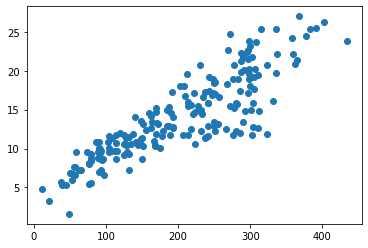

In [88]:
plt.scatter(ads,df1['Sales'])

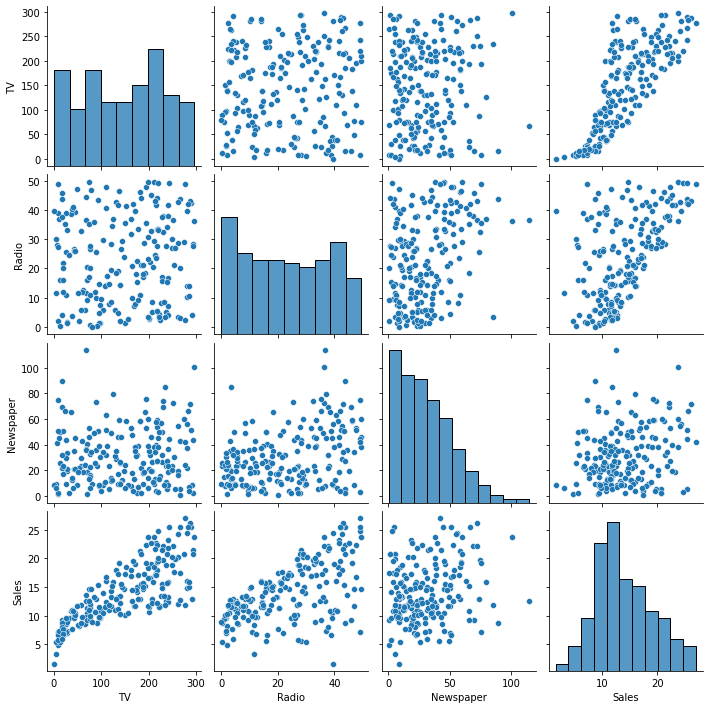

In [89]:
sns.pairplot(df1)

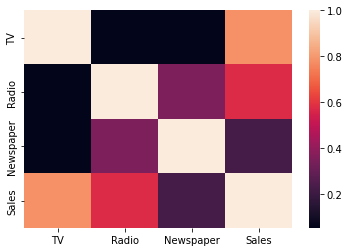

In [90]:
sns.heatmap(df1.corr())

In [91]:
y = df1.pop('Sales')
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [92]:
x = df1

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lm = LinearRegression()

In [97]:
lm.fit(X_train,y_train)

LinearRegression()

In [98]:
print(lm.intercept_) 

3.228620250735169


In [99]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.044818
Radio,0.180295
Newspaper,0.001170


Holding all other advertisement types fixed, a **1 unit increase in TV Advertisements is associated with an increase of 0.044818 units in sales.**

In [100]:
predictions = lm.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


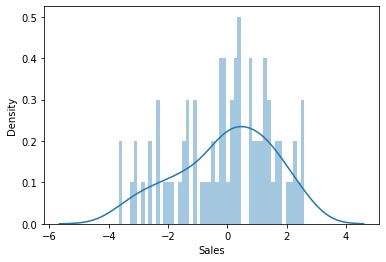

In [101]:
sns.distplot((y_test-predictions),bins=50);

In [102]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)

In [103]:
results = model.fit()
results.params

TV           0.053252
Radio        0.218504
Newspaper    0.022750
dtype: float64

In [104]:
predictions = results.predict(X_test)

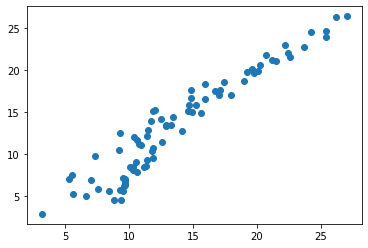

In [105]:
plt.scatter(y_test,predictions)

In [106]:
# abline(lm(Salary~YearsExperience,data=Salary_Data),col='red')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


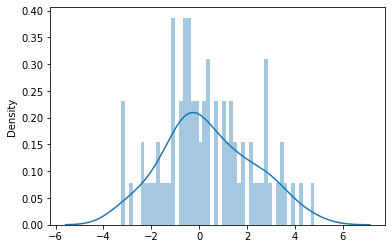

In [107]:
sns.distplot((y_test-predictions),bins=50);

## Question 2

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [109]:
df2 = pd.read_csv('/content/pima-indians-diabetes.csv')
df2

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [110]:
from sklearn.model_selection import train_test_split

x = df2.drop(['1'], axis=1)
y = df2["1"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [111]:
import pandas as pd
from sklearn import preprocessing

# x = df2.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df2 = pd.DataFrame(x_scaled)
# df2


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df2)
df2 = pd.DataFrame(scaled)
df2

,0,1,2,3,4,5,6,7,8
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940,-0.730753
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795,1.368451
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393,-0.730753
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650,1.368451
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086,-0.730753
...,...,...,...,...,...,...,...,...,...
762,1.827945,-0.621423,0.356400,1.723720,0.868833,0.115363,-0.907610,2.535709,-0.730753
763,-0.546874,0.035698,0.046411,0.406582,-0.693559,0.610039,-0.397469,-0.529522,-0.730753
764,0.343683,0.004406,0.149740,0.155698,0.278596,-0.734465,-0.684235,-0.274086,-0.730753
765,-0.843726,0.160863,-0.470238,-1.286882,-0.693559,-0.239789,-0.370302,1.173384,1.368451


In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
predictions = knn.predict(xtest)

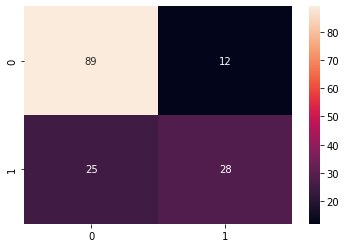

In [113]:
from sklearn.metrics import accuracy_score,confusion_matrix
knn_conf = confusion_matrix(ytest,predictions)
sns.heatmap(knn_conf,cbar=True,annot=True)

In [114]:
knnpred = [[]]
from sklearn.neighbors import KNeighborsClassifier
for _ in range (1,20):
  knn = KNeighborsClassifier(n_neighbors=_)
  knn.fit(xtrain,ytrain)
  knnpred.append(knn.predict(xtest))
knnpred

[[], array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]), array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1